In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [17]:
df = pd.read_csv('/Users/rschm/Downloads/DateTimeCleanedReservationsAll.csv')
df.head()

,Facility Class,Facility Location,Facility Code,Facility,Status,Reservation Type,Headcount,BeginTimeDate,EndTimeDate,Duration Minutes,Weekday,Month,Year,BeginTime
0,BDEF,CARN,CAREF,Entire Facility,Firm,Facility,100.000000,1/6/13 9:00,1/6/13 12:30,210,6,1,2013,9.0
1,BDMUL,CARN,HRTG,Heritage Room l,Firm,Facility,100.000000,1/6/13 17:00,1/6/13 23:00,360,6,1,2013,17.0
2,BDMUL,CARN,HRTG,Heritage Room l,Firm,Activity,36.387374,1/7/13 17:30,1/7/13 18:25,55,0,1,2013,17.5
3,BDMUL,CARN,HRTG,Heritage Room l,Firm,Activity,36.387374,1/9/13 17:30,1/9/13 18:25,55,2,1,2013,17.5
4,BDMUL,CARN,HRTG,Heritage Room l,Firm,Activity,36.387374,1/9/13 19:00,1/9/13 20:15,75,2,1,2013,19.0


In [18]:
#We do not need the full date time objects
df = df.drop(columns=['BeginTimeDate', 'EndTimeDate'])
# Convert categorical variables using factorize
cols = ['Facility Class', 'Facility Location', 'Facility Code', 'Facility', 'Status', 'Reservation Type']
df[cols] = df[cols].apply(lambda x: pd.factorize(x)[0])

In [19]:
df.head()

,Facility Class,Facility Location,Facility Code,Facility,Status,Reservation Type,Headcount,Duration Minutes,Weekday,Month,Year,BeginTime
0,0,0,0,0,0,0,100.000000,210,6,1,2013,9.0
1,1,0,1,1,0,0,100.000000,360,6,1,2013,17.0
2,1,0,1,1,0,1,36.387374,55,0,1,2013,17.5
3,1,0,1,1,0,1,36.387374,55,2,1,2013,17.5
4,1,0,1,1,0,1,36.387374,75,2,1,2013,19.0


In [34]:
x=df.iloc[:, df.columns != 'Facility Class']  #Independent variable
y=df.iloc[:, df.columns == 'Facility Class']   #Target variable
f_score=chi2(x,y)   #returns f score and p value 
f_score

(array([3.50826009e+04, 3.78961697e+05, 3.92562466e+05, 1.18267587e+04,
        1.79440547e+04, 3.20734397e+05, 3.58630106e+06, 6.90152087e+03,
        4.28678443e+02, 1.71599084e+01, 4.61850366e+03]),
 array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        6.41204070e-82, 3.09395312e-01, 0.00000000e+00]))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Facility Location'),
  Text(1, 0, 'Facility Code'),
  Text(2, 0, 'Facility'),
  Text(3, 0, 'Status'),
  Text(4, 0, 'Reservation Type'),
  Text(5, 0, 'Headcount'),
  Text(6, 0, 'Duration Minutes'),
  Text(7, 0, 'Weekday'),
  Text(8, 0, 'Month'),
  Text(9, 0, 'Year'),
  Text(10, 0, 'BeginTime')])

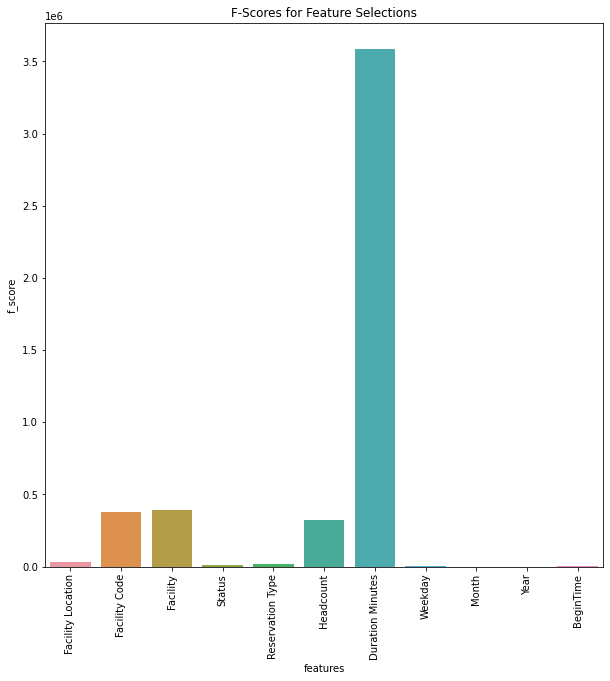

In [37]:
x=df.iloc[:, df.columns != 'Facility Class']  #Independent variable
y=df.iloc[:, df.columns == 'Facility Class']   #Target variable
f_score, p_value = chi2(x, y)

# create a DataFrame of f-scores
df_fscore = pd.DataFrame({'features': x.columns, 'f_score': f_score})

# plot the f-scores using a bar plot
plt.figure(figsize=(10,10))
sns.barplot(x='features', y='f_score', data=df_fscore)
plt.title("F-Scores for Feature Selections")
plt.xticks(rotation=90)

In [22]:
# printing p values for each categorical features
p_value=pd.Series(f_score[1],index=x.columns)
p_value.sort_values(ascending=True,inplace=True)
print(p_value)

Facility Location    0.000000e+00
Facility Code        0.000000e+00
Facility             0.000000e+00
Status               0.000000e+00
Reservation Type     0.000000e+00
Headcount            0.000000e+00
Duration Minutes     0.000000e+00
Weekday              0.000000e+00
BeginTime            0.000000e+00
Month                6.412041e-82
Year                 3.093953e-01
dtype: float64


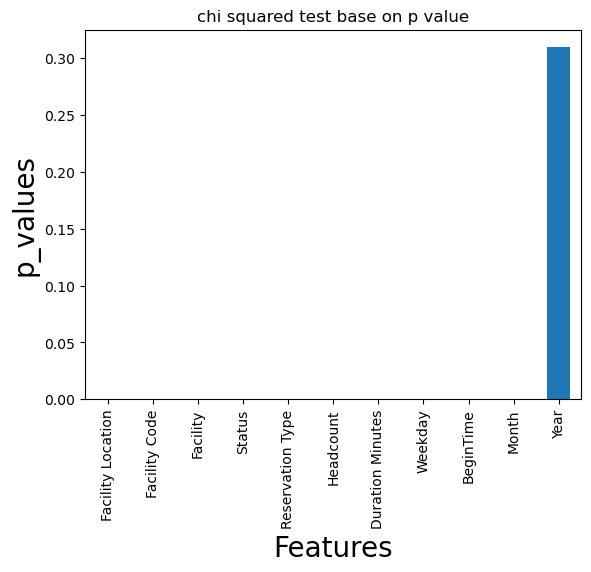

In [25]:
import matplotlib.pyplot as plt 
import seaborn as sns

p_value.plot(kind="bar")
plt.xlabel("Features",fontsize=20)
plt.ylabel("p_values",fontsize=20)
plt.title("chi squared test base on p value")
plt.show()

In [24]:
x=df.iloc[:, df.columns != 'Reservation Type']  #Independent variable
y=df.iloc[:, df.columns == 'Reservation Type']   #Target variable
f_score=chi2(x,y)   #returns f score and p value 
# printing p values for each categorical features
p_value=pd.Series(f_score[1],index=x.columns)
p_value.sort_values(ascending=True,inplace=True)
print(p_value)

Facility Code         0.000000e+00
Facility              0.000000e+00
Status                0.000000e+00
Headcount             0.000000e+00
Duration Minutes      0.000000e+00
Weekday               0.000000e+00
Facility Location    4.525064e-207
Facility Class        2.180652e-80
BeginTime             5.223466e-27
Month                 4.201561e-01
Year                  8.238688e-01
dtype: float64


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

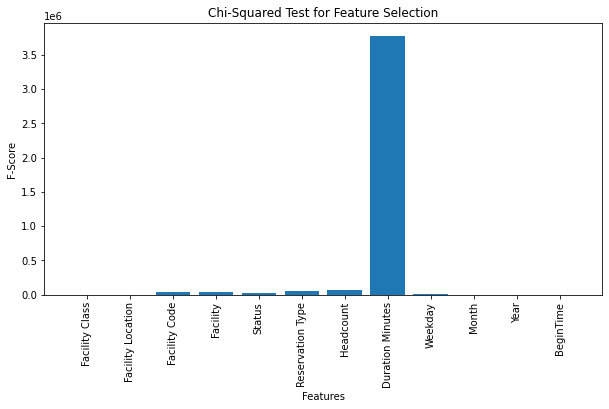

In [40]:
x=df.iloc[:, df.columns != 'Reservation Type']  #Independent variable
y=df.iloc[:, df.columns == 'Reservation Type']   #Target variable
f_score=chi2(x,y)   #returns f score and p value 
# printing p values for each categorical features
p_value=pd.Series(f_score[1],index=x.columns)
p_value.sort_values(ascending=True,inplace=True)

# get the f-scores for all features
f_score, _ = chi2(df, y)

# create a bar chart of all features and their f-scores
plt.figure(figsize=(10,5))
plt.bar(df.columns, f_score)
plt.xlabel('Features')
plt.ylabel('F-Score')
plt.title('Chi-Squared Test for Feature Selection')
plt.xticks(rotation=90)


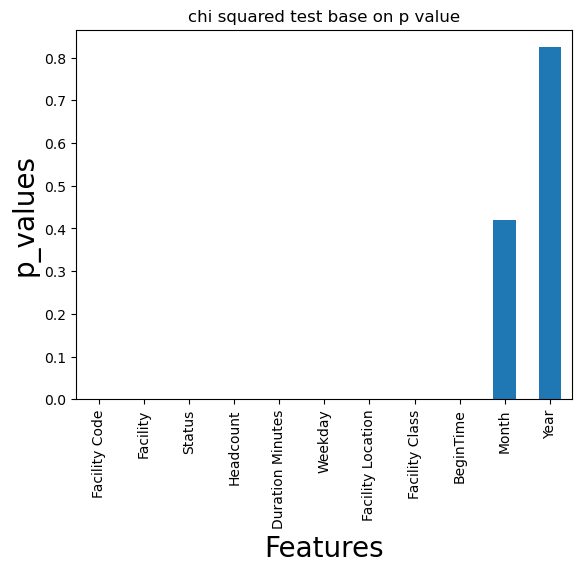

In [29]:
import matplotlib.pyplot as plt 
import seaborn as sns

p_value.plot(kind="bar")
plt.xlabel("Features",fontsize=20)
plt.ylabel("p_values",fontsize=20)
plt.title("chi squared test base on p value")
plt.show()

In [30]:
from sklearn.feature_selection import SelectKBest

# for classification, we use these three
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

# this function will take in X, y variables 
# with criteria, and return a dataframe
# with most important columns
# based on that criteria
def featureSelect_dataframe(X, y, criteria, k):

    # initialize our function/method
    reg = SelectKBest(criteria, k=k).fit(X,y)
    
    # transform after creating the reg (so we can use getsupport)
    X_transformed = reg.transform(X)

    # filter down X based on kept columns
    X = X[[val for i,val in enumerate(X.columns) if reg.get_support()[i]]]

    # return that dataframe
    return X

In [33]:
New_X = featureSelect_dataframe(x, y, chi2, 4)

New_X

,Facility Code,Facility,Headcount,Duration Minutes
0,0,0,100.000000,210.0
1,1,1,100.000000,360.0
2,1,1,36.387374,55.0
3,1,1,36.387374,55.0
4,1,1,36.387374,75.0
...,...,...,...,...
123644,39,39,17.949062,300.0
123645,22,21,7.000000,55.0
123646,22,21,6.000000,55.0
123647,22,21,15.000000,45.0


In [36]:
New_X = featureSelect_dataframe(x, y, mutual_info_classif, 4)

New_X

/Users/patrickmoll/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Facility Code,Facility,Headcount,Duration Minutes
0,0,0,100.000000,210.0
1,1,1,100.000000,360.0
2,1,1,36.387374,55.0
3,1,1,36.387374,55.0
4,1,1,36.387374,75.0
...,...,...,...,...
123644,39,39,17.949062,300.0
123645,22,21,7.000000,55.0
123646,22,21,6.000000,55.0
123647,22,21,15.000000,45.0


In [39]:
from sklearn.feature_selection import mutual_info_regression, f_regression
New_X = featureSelect_dataframe(x, y, mutual_info_regression, 4)

New_X

/Users/patrickmoll/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Facility Code,Facility,Headcount,Duration Minutes
0,0,0,100.000000,210.0
1,1,1,100.000000,360.0
2,1,1,36.387374,55.0
3,1,1,36.387374,55.0
4,1,1,36.387374,75.0
...,...,...,...,...
123644,39,39,17.949062,300.0
123645,22,21,7.000000,55.0
123646,22,21,6.000000,55.0
123647,22,21,15.000000,45.0


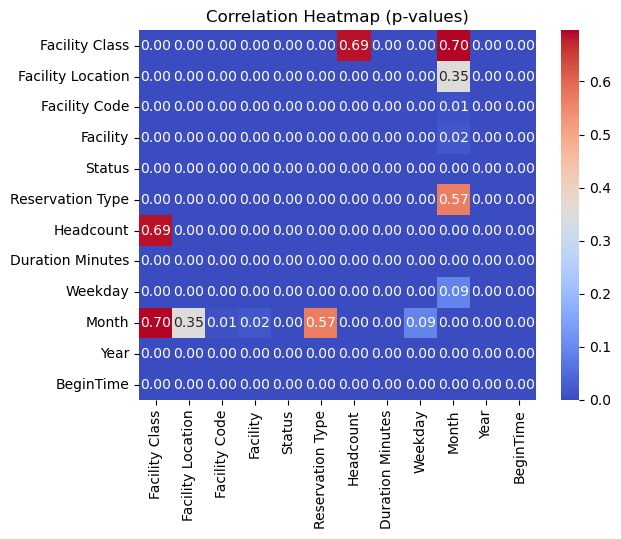

In [69]:
corr_matrix = df.corr()
#p_values = corr_matrix.apply(lambda x: x.apply(lambda y: float("{:.2f}".format(y))))

from scipy.stats import pearsonr

p_values = corr_matrix.copy()

for i in corr_matrix.columns:
    for j in corr_matrix.columns:
        pearson_coef, p_value = pearsonr(df[i], df[j])
        p_values.loc[i, j] = p_value
# create a heatmap using seaborn
sns.heatmap(p_values, cmap='coolwarm', annot=True, fmt='.2f')

plt.title('Correlation Heatmap (p-values)')
plt.show()

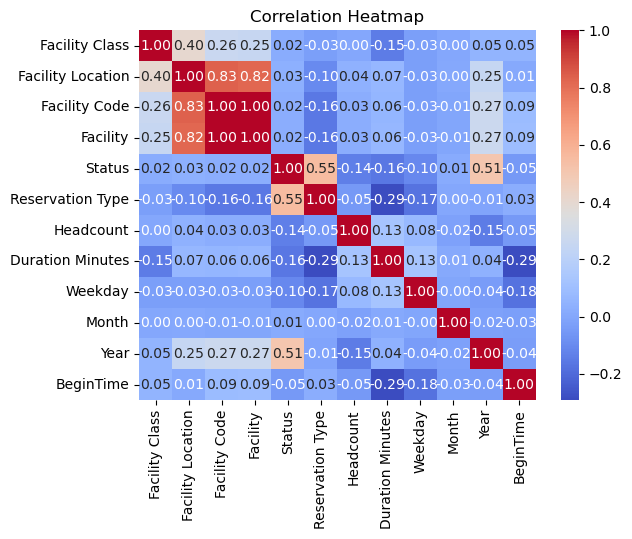

In [70]:
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f')

plt.title('Correlation Heatmap')
plt.show()